In [1]:
# The following code demonstrates my data analytics and statistics skills using numpy and pandas functions.
# I gathered the basic data such as the data types for each variable and the descriptive statistics.
# I renamed the columns of the dataframe.
# I created functions to calculate the mean and perform a t-test on the variables, and created a table showing the mean and p-value for each variable.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv')
data.head()

# impulse = HR, kcm = CK-MB, class = presence of heart attack, gender: 0=F, 1=M

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
# checking data types
data.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [4]:
# renaming columns
data = data.rename(columns={'class': 'heart_attack', 'impluse': 'hr', 'pressurehight': 'systolic', 'pressurelow': 'diastolic'})
data

,age,gender,hr,systolic,diastolic,glucose,kcm,troponin,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [5]:
# checking for null values
data.isnull().sum()

age             0
gender          0
hr              0
systolic        0
diastolic       0
glucose         0
kcm             0
troponin        0
heart_attack    0
dtype: int64

In [6]:
# checking for duplicates
data.duplicated().sum()

0

# Exploratory Data Analysis

In [7]:
# detecting outliers numerically
data.describe()

,age,gender,hr,systolic,diastolic,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


<Axes: xlabel='age'>

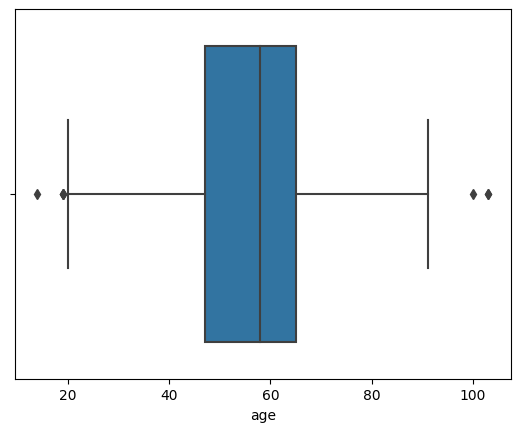

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# detecting outliers visually
sns.boxplot(x=data['age'])

<Axes: xlabel='hr'>

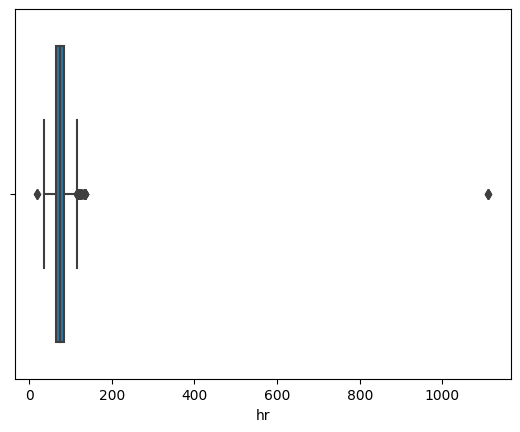

In [9]:
sns.boxplot(x=data['hr'])

<Axes: xlabel='systolic'>

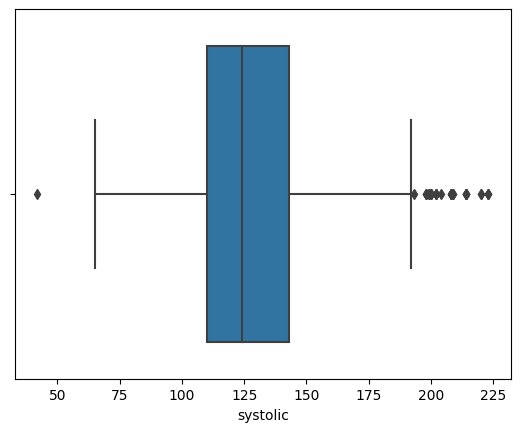

In [10]:
sns.boxplot(x=data['systolic'])

<Axes: xlabel='diastolic'>

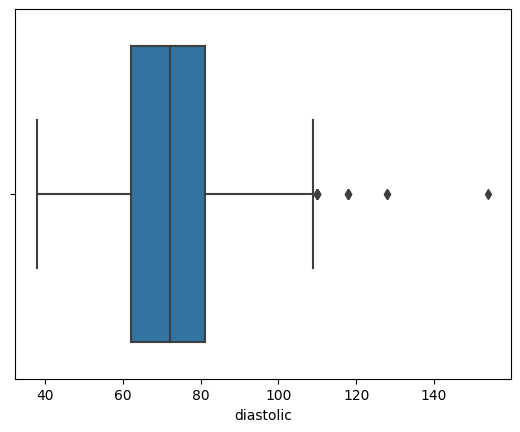

In [11]:
sns.boxplot(x=data['diastolic'])

<Axes: xlabel='glucose'>

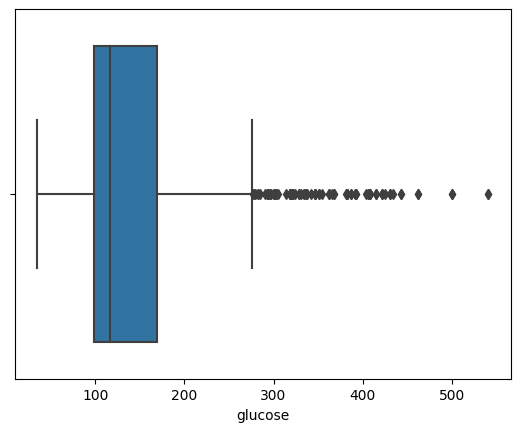

In [12]:
sns.boxplot(x=data['glucose'])

<Axes: xlabel='kcm'>

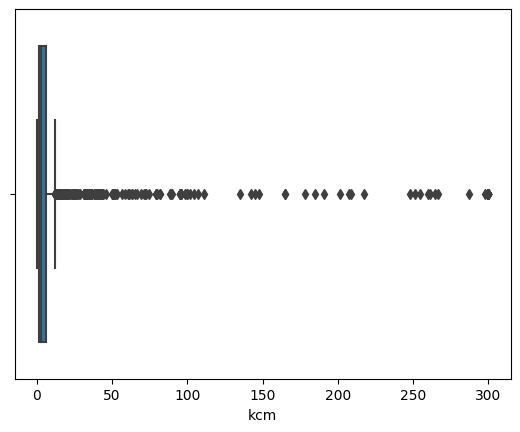

In [13]:
sns.boxplot(x=data['kcm'])

<Axes: xlabel='troponin'>

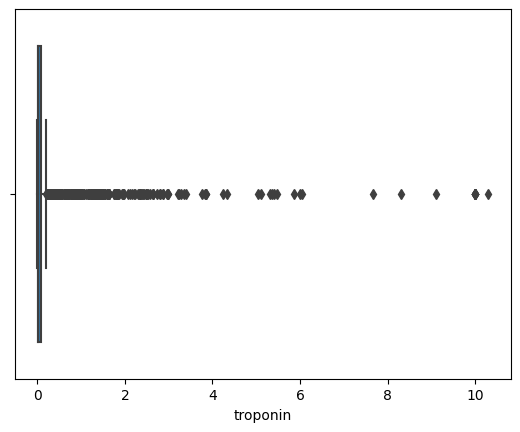

In [14]:
sns.boxplot(x=data['troponin'])

# Removing Outliers

In [15]:
# removing outliers using IQR
new_data = data.copy()
new_data['heart_attack'] = new_data['heart_attack'].replace(['positive', 'negative'], [1, 0])

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1    
new_data = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

new_data['heart_attack'] = new_data['heart_attack'].replace([1, 0], ['positive', 'negative'])

# confirm outliers removed
new_data.describe()

,age,gender,hr,systolic,diastolic,glucose,kcm,troponin
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,55.603295,0.626109,74.977186,125.590621,71.820025,130.089607,3.117712,0.023231
std,13.724392,0.484142,13.838425,23.452803,13.411036,47.753047,2.154133,0.035346
min,21.000000,0.000000,36.000000,65.000000,38.000000,35.000000,0.321000,0.002000
25%,45.000000,0.000000,63.000000,110.000000,61.000000,96.000000,1.600000,0.005000
50%,56.000000,1.000000,74.000000,124.000000,71.000000,111.000000,2.490000,0.010000
75%,66.000000,1.000000,84.000000,143.000000,81.000000,152.000000,4.100000,0.023000
max,91.000000,1.000000,116.000000,192.000000,105.000000,276.000000,11.940000,0.203000


# Independent T-test

In [16]:
# mean for each risk factor by presence of heart attack
MI_mean = new_data.groupby('heart_attack').mean()
MI_mean

,age,gender,hr,systolic,diastolic,glucose,kcm,troponin
heart_attack,,,,,,,,
negative,52.076577,0.587838,75.400901,126.470721,72.198198,131.600676,2.574489,0.006633
positive,60.142029,0.675362,74.431884,124.457971,71.333333,128.144928,3.816817,0.044591


In [17]:
from scipy.stats import ttest_ind

# performing t-test on all risk factors
group1 = new_data[new_data['heart_attack'] == 'negative']
group2 = new_data[new_data['heart_attack'] == 'positive']

In [18]:
trop_ttest = ttest_ind(group1['troponin'], group2['troponin'])
trop_ttest

TtestResult(statistic=-17.674599344159148, pvalue=3.9652364096817557e-59, df=787.0)

In [19]:
kcm_ttest = ttest_ind(group1['kcm'], group2['kcm'])
kcm_ttest

TtestResult(statistic=-8.381400116496913, pvalue=2.39757685617496e-16, df=787.0)

In [20]:
glc_ttest = ttest_ind(group1['glucose'], group2['glucose'])
glc_ttest

TtestResult(statistic=1.008342664140384, pvalue=0.3135999026661585, df=787.0)

In [21]:
diastolic_ttest = ttest_ind(group1['diastolic'], group2['diastolic'])
diastolic_ttest

TtestResult(statistic=0.8984529070887843, pvalue=0.3692189294869921, df=787.0)

In [22]:
systolic_ttest = ttest_ind(group1['systolic'], group2['systolic'])
systolic_ttest

TtestResult(statistic=1.1961239976745672, pvalue=0.23200841360136173, df=787.0)

In [23]:
hr_ttest = ttest_ind(group1['hr'], group2['hr'])
hr_ttest

TtestResult(statistic=0.9756497177784661, pvalue=0.3295378687193534, df=787.0)

In [24]:
age_ttest = ttest_ind(group1['age'], group2['age'])
age_ttest

TtestResult(statistic=-8.555252729675994, pvalue=6.107283513038615e-17, df=787.0)

In [25]:
gender_ttest = ttest_ind(group1['gender'], group2['gender'])
gender_ttest

TtestResult(statistic=-2.527545845038742, pvalue=0.011680974469955786, df=787.0)

In [26]:
# create new data frame with t-test results for each risk factor
ttest_results = pd.DataFrame({'factor': ['CK-MB', 'troponin', 'glucose', 'systolic', 'diastolic', 'hr', 'age', 'gender'], 
                              'pvalue': ["{:.2e}".format(kcm_ttest.pvalue), "{:.2e}".format(trop_ttest.pvalue), "{:.2e}".format(glc_ttest.pvalue), "{:.2e}".format(systolic_ttest.pvalue), "{:.2e}".format(diastolic_ttest.pvalue), "{:.2e}".format(hr_ttest.pvalue), "{:.2e}".format(age_ttest.pvalue), "{:.2e}".format(gender_ttest.pvalue)], 
                              'heart_attack_mean': [MI_mean.kcm.loc['positive'], MI_mean.troponin.loc['positive'], MI_mean.glucose.loc['positive'], MI_mean.systolic.loc['positive'], MI_mean.diastolic.loc['positive'], MI_mean.hr.loc['positive'], MI_mean.age.loc['positive'], MI_mean.gender.loc['positive']], 
                              'control_mean': [MI_mean.kcm.loc['negative'], MI_mean.troponin.loc['negative'], MI_mean.glucose.loc['negative'], MI_mean.systolic.loc['negative'], MI_mean.diastolic.loc['negative'], MI_mean.hr.loc['negative'], MI_mean.age.loc['negative'], MI_mean.gender.loc['negative']]})

ttest_results

,factor,pvalue,heart_attack_mean,control_mean
0,CK-MB,2.40e-16,3.816817,2.574489
1,troponin,3.97e-59,0.044591,0.006633
2,glucose,3.14e-01,128.144928,131.600676
3,systolic,2.32e-01,124.457971,126.470721
4,diastolic,3.69e-01,71.333333,72.198198
5,hr,3.30e-01,74.431884,75.400901
6,age,6.11e-17,60.142029,52.076577
7,gender,1.17e-02,0.675362,0.587838


# Plotting Different Features

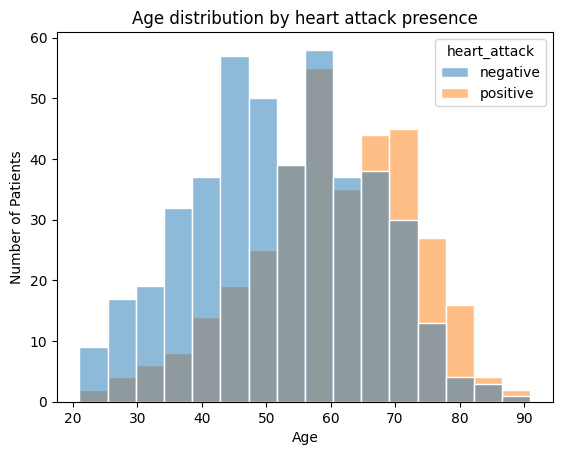

In [27]:
# histogram to compare presence of heart attack by age
sns.histplot(new_data, x='age', hue='heart_attack', edgecolor='white')
plt.title('Age distribution by heart attack presence')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

* demonstrates that heart attacks are more prevalent as you age

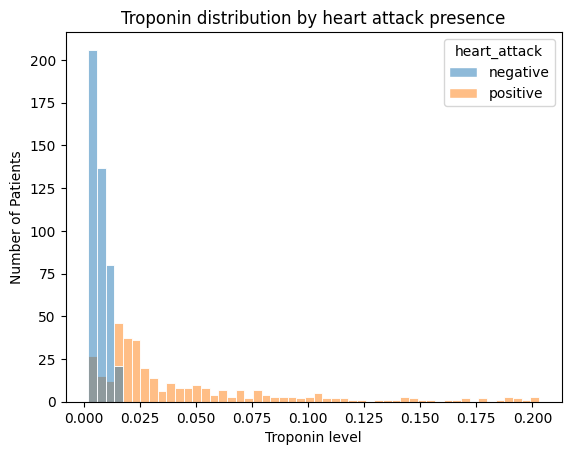

In [28]:
# histogram to compare presence of heart attack by troponin level
sns.histplot(new_data, x='troponin', hue='heart_attack', edgecolor='white')
plt.title('Troponin distribution by heart attack presence')
plt.xlabel('Troponin level')
plt.ylabel('Number of Patients')
plt.show()

* less likely to develop heart attack with low troponin
* all patients had heart attack when above a certain troponin threshold (slightly lower than 0.025)

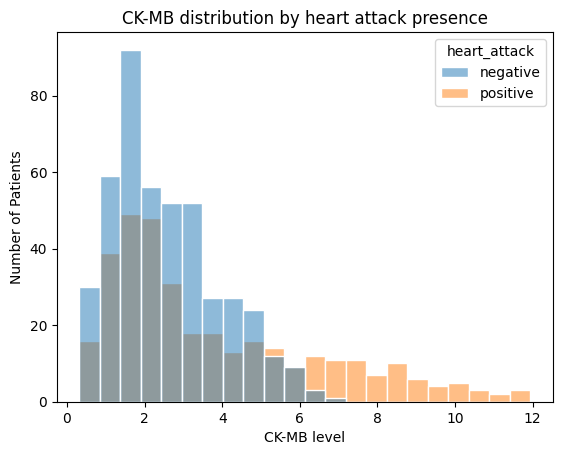

In [29]:
# histogram to compare presence of heart attack by CK-MB level
sns.histplot(new_data, x='kcm', hue='heart_attack', edgecolor='white')
plt.title('CK-MB distribution by heart attack presence')
plt.xlabel('CK-MB level')
plt.ylabel('Number of Patients')
plt.show()

* most of the patient population had a relatively low CK-MB level (right-skewed)
* all patients with CK-MB level above 7 had a heart attack

### scatterplots evaluating the relationships between the top 3 strongest risk factors for heart attack:

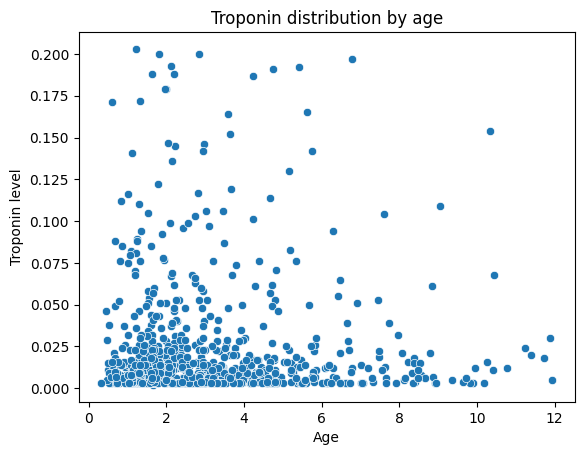

In [30]:
# evaluating correlation between troponin level and age
sns.scatterplot(data=new_data, x='kcm', y='troponin')
plt.title('Troponin distribution by age')
plt.xlabel('Age')
plt.ylabel('Troponin level')
plt.show()

* no correlation between troponin and age

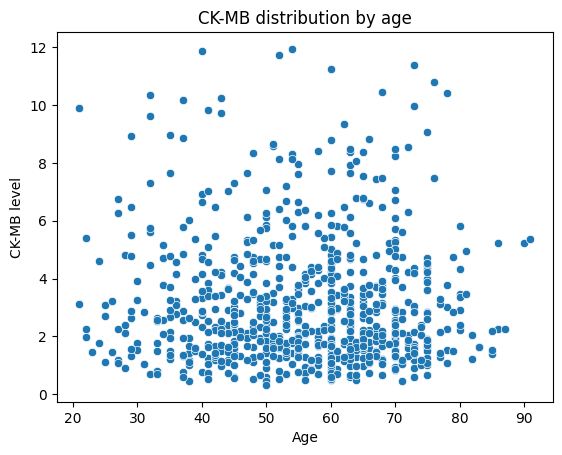

In [31]:
# evaluating correlation between ck-mb level and age
sns.scatterplot(data=new_data, x='age', y='kcm')
plt.title('CK-MB distribution by age')
plt.xlabel('Age')
plt.ylabel('CK-MB level')
plt.show()

* no correlation between ck-mb level and age

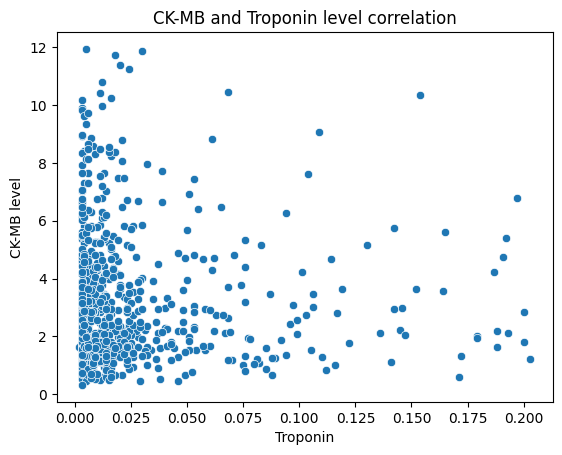

In [32]:
# evaluating correlation between ck-mb level and troponin
sns.scatterplot(data=new_data, x='troponin', y='kcm')
plt.title('CK-MB and Troponin level correlation')
plt.xlabel('Troponin')
plt.ylabel('CK-MB level')
plt.show()

* varying CK-MB level in patients with low troponin
* high troponin level not really correlated with high CK-MB level